## Logistic Map
Originally used as a discrete time model for ecology/population growth, the logistic map is one of the simplest equations showing chaotic behaviour. It is defined by the recurrence relation:

$$
x_{n+1} = k x_n (1 - x_n)
$$

The size of the population is represented by *x*, ranging from 0 to 1 (the maximum for a given ecosystem). Initial conditions should therefore be 0 < *x* < 1. The dynamics of the system is determined by the value of the parameter *k* - convergence to a steady state for *k* < 3, oscillatory behaviour for 3 < *k* < 3.45 (corresponding to recurrent population booms and crashes), and chaotic behaviour seen for *k* between around 3.57 (onset of chaos) and 4.

https://en.wikipedia.org/wiki/Logistic_map

In [1]:
import numpy as np
from scipy import *
import matplotlib.pyplot as plt


def logistic_map(x, k):
    return k * x * (1. - x)


### Sensitive dependence on initial conditions
Picking *k* = 3.8 ensures chaos - intuitively, chaotic behaviour is synonymous with sensitive dependence on initial conditions - a tiny discrepancy in initial conditions between two trajectories will rapidly result in divergence. 

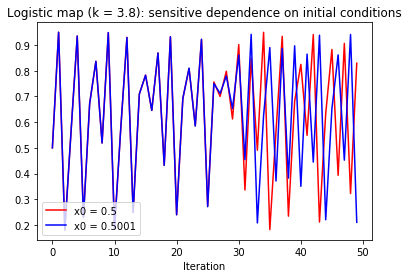

In [2]:
k = 3.8
steps = 50

x1 = 0.5
x2 = 0.5001

x1s = [x1]
x2s = [x2]
    
for i in range(steps-1):
    x1 = logistic_map(x1, k)
    x2 = logistic_map(x2, k)
    x1s.append(x1)
    x2s.append(x2)
    
plt.plot(np.arange(steps), x1s, c='r', label='x0 = 0.5')
plt.plot(np.arange(steps), x2s, c='b', label='x0 = 0.5001')
plt.title('Logistic map (k = 3.8): sensitive dependence on initial conditions')
plt.xlabel('Iteration')
plt.legend(loc='lower left')
plt.show()


A difference of 1e-4 in initial conditions leads to visible divergence after 25 iterations, and full divergence after around 35 iterations. 

Different 'attractors' for the system (stable final states or periodic orbits) can be seen on a bifurcation diagram, with the corresponding attractor (vertical) plotted for increasing values of the parameter *k*. As is clear from the name, there is not a sharp distinction between a single (or a few) stable states and chaos: instead, there are successive period doublings. Feigenbaum noticed that the speed of these period doublings increases such as to tend (in the limit) to a constant ratio - now known as the Feigenbaum constant:

$$
\delta =\lim _{n\to \infty }{\frac {k_{n-1}-k_{n-2}}{k_{n}-k_{n-1}}}=4.669\,201\,609\,...
$$

Where subscripted values k_i are those at which the period doubles for the ith time. This constant is highly general, applying to all such one parameter maps, and is believed to be transcendental (as with other constants such as *e* and pi).

https://en.wikipedia.org/wiki/Feigenbaum_constants

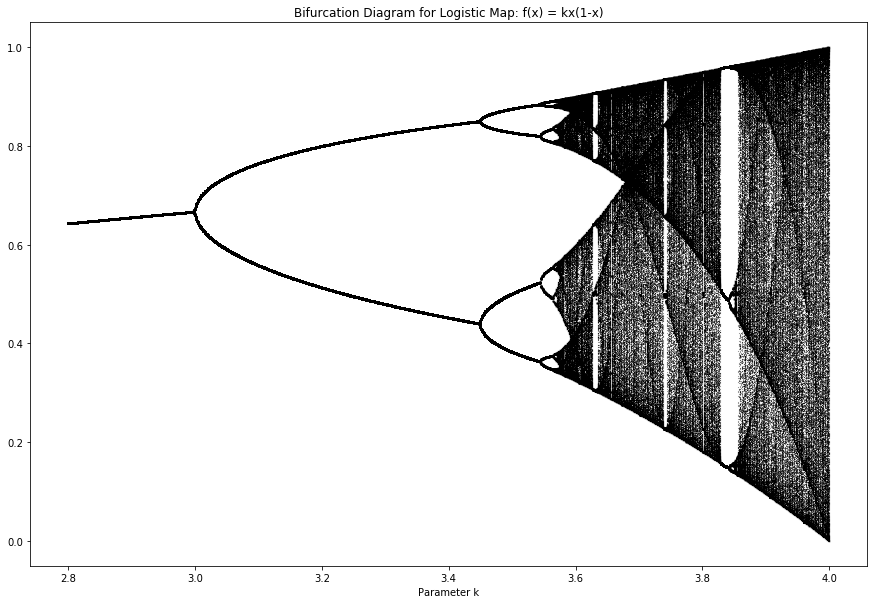

In [3]:
params = np.linspace(2.8, 4.0, 1201)

xs = []
ys = []

for k in params:
    # Find a point on the attractor:
    x0 = np.random.random()
    for i in range(1000):
        x0 = logistic_map(x0, k)
    
    # Explore attractor:
    for i in range(1000):
        x0 = logistic_map(x0, k)
        xs.append(k)
        ys.append(x0)
        
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.scatter(xs, ys, s=0.01, marker='x', c='black')
plt.title('Bifurcation Diagram for Logistic Map: f(x) = kx(1-x)')
plt.xlabel('Parameter k')
plt.show()


In [4]:
params = np.linspace(2.8, 3.6, 6001)

ks = []
period = []

for k in params:
    
    # Find a point on the attractor:
    x0 = 0.5
    for i in range(2000):
        x0 = logistic_map(x0, k)
    
    xs = []
    # Explore attractor:
    for i in range(1000):
        x0 = logistic_map(x0, k)
        xs.append(int(1000 * x0)) # threshold
        
    period.append(len(np.unique(xs)))
    ks.append(k)


In [5]:
p = 2
k_n = []
for i in range(len(ks)):
    if period[i] == p:
        k_n.append(ks[i])
        p *= 2
print k_n

[3.0005333333333333, 3.4489333333333332, 3.5442666666666667, 3.5646666666666667, 3.5741333333333332, 3.5836000000000001]


In [6]:
print 'n \tperiod \tApprox. Feigenbaum constant'

for i in range(len(k_n) - 2):
    print i+1, '\t', 2**(i+1), '\t', (k_n[i+1] - k_n[i]) / ((k_n[i+2] - k_n[i+1]))

n 	period 	Approx. Feigenbaum constant
1 	2 	4.7034965035
2 	4 	4.67320261438
3 	8 	2.15492957746
4 	16 	1.0


The second value is accurate to better than one part in a thousand - the third and fourth are way off. This is likely due to limitations of (a) picking a constant separation between values of k, and (b) the heuristic used to locate period doublings.